In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models

import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


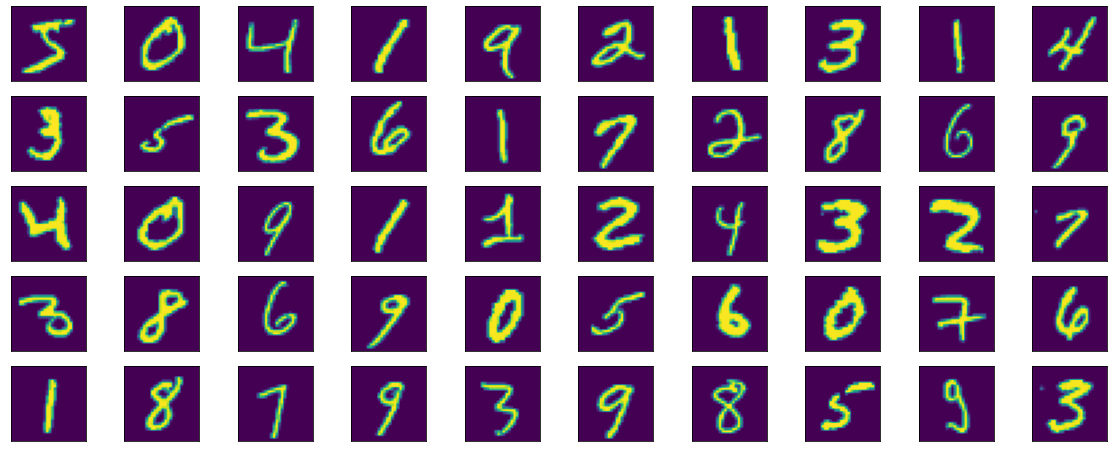

In [3]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])    
plt.show()

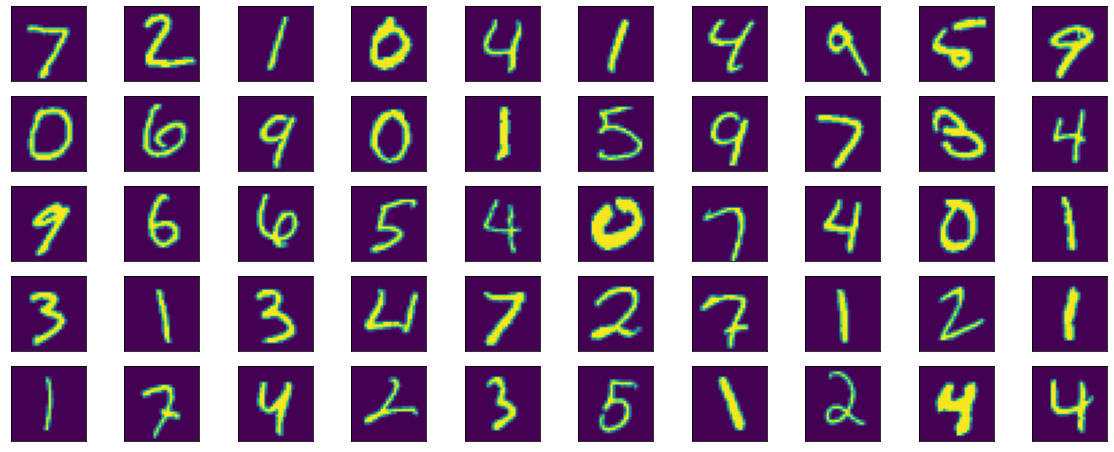

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])    
plt.show()

In [5]:
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

In [6]:
model = models.Sequential()

model.add(layers.Conv2D( 32, (3,3), activation='relu', input_shape=(28,28,1) ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D( 64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D( 64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [7]:
model.compile( optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

h= model.fit(x=train_images, y=train_labels, epochs=30,validation_split=0.2, batch_size=32)

Epoch 1/30
1500/1500 [==============================] - 7s 3ms/step - loss: 0.6874 - accuracy: 0.7979 - val_loss: 0.1818 - val_accuracy: 0.9463
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1565 - accuracy: 0.9524 - val_loss: 0.1248 - val_accuracy: 0.9623
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1052 - accuracy: 0.9684 - val_loss: 0.0890 - val_accuracy: 0.9716
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9743 - val_loss: 0.0751 - val_accuracy: 0.9784
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0701 - accuracy: 0.9775 - val_loss: 0.0769 - val_accuracy: 0.9763
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.0623 - val_accuracy: 0.9812
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0658 - val_accuracy:

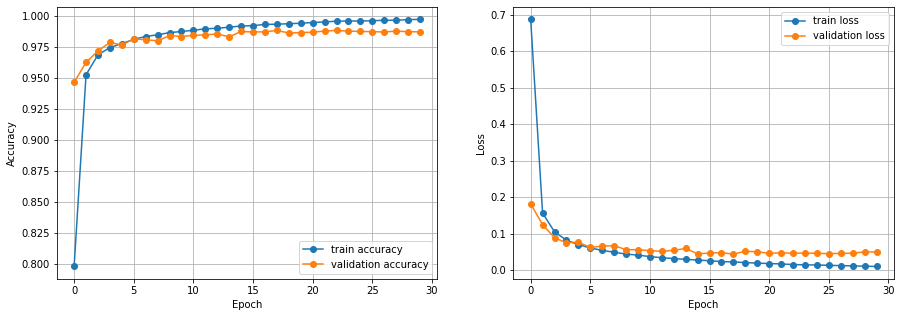

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc
test_loss

313/313 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9883


0.03987845033407211

In [10]:
predictions = model.predict(test_images)
np.argmax(predictions[11])

6

1. Optimaizer: Adam, with normalization; test accuracy: 99.05%
2. Optimaizer: Adam, without normalization; test accuracy: 98.61%
3. Optimaizer: SGD, with normalization; test accuracy: 98.83%
4. Optimaizer: SGD, without normalization; test accuracy: 96.39%
5. Optimaizer: RMSprop, with normalization; test accuracy: 98.86%
6. Optimaizer: RMSprop, without normalization; test accuracy: 97.07%